<a href="https://colab.research.google.com/github/amanjaiswal73892/changemypet/blob/master/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True).eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!git clone "https://github.com/amanjaiswal73892/changemypet.git"

Cloning into 'changemypet'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 3), reused 27 (delta 1), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [18]:
# sample execution (requires torchvision)
from PIL import Image, ImageOps
from torchvision import transforms

input_image = Image.open('/content/dog_translate.png')
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
# ouput_original_image = output.argmax(0).float()

In [ ]:
# # create a color pallette, selecting a color for each class
# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# # plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(ouput_original_image.byte().cpu().numpy()).resize(input_image.size)
# r.putpalette(colors)

# import matplotlib.pyplot as plt
# plt.imshow(r)
# # plt.show()

In [7]:
from changemypet.src.biggan import BigGAN512
import torch 
import torchvision
from scipy.stats import truncnorm
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [9]:
truncation = torch.clamp(torch.tensor(0.4), min=0.02+1e-4, max=1.0-1e-4).float()  # truncation is 0.4
c = torch.tensor((156,)).long()  # class_label is 260
z = truncation * torch.as_tensor(truncnorm.rvs(-2.0, 2.0, size=(1, 128),random_state=1)).float()

z.requires_grad = True

biggan = BigGAN512()

biggan.load_state_dict(torch.load("/content/drive/My Drive/biggan/biggan512-release.pt"))

<All keys matched successfully>

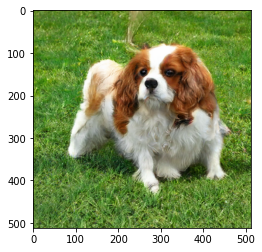

In [14]:
biggan.eval()
img = biggan(z, c, truncation.item())
pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
import PIL
# pil=ImageOps.mirror(pil)
# pil=pil.transpose(PIL.Image.ROTATE_90)
plt.imshow(pil)
# pil.save("dog_translate.png")

cost_old 1  is  tensor(1.4425, device='cuda:0', grad_fn=<SqrtBackward>)
cost 1  is  tensor(0.8368, device='cuda:0', grad_fn=<NllLoss2DBackward>)


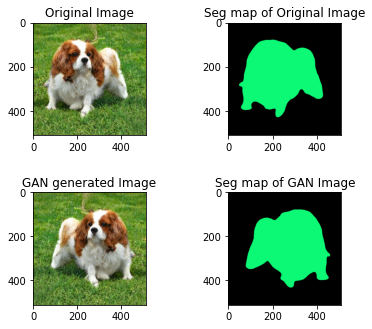

----------------------------------------------------------------------------------------------------
cost_old 2  is  tensor(1.3416, device='cuda:0', grad_fn=<SqrtBackward>)
cost 2  is  tensor(0.6572, device='cuda:0', grad_fn=<NllLoss2DBackward>)


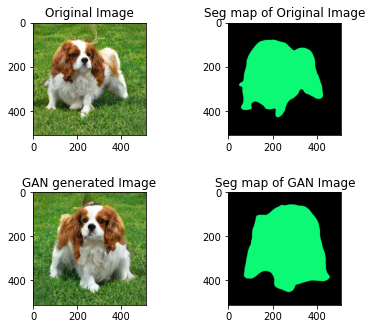

----------------------------------------------------------------------------------------------------
cost_old 3  is  tensor(1.2801, device='cuda:0', grad_fn=<SqrtBackward>)
cost 3  is  tensor(0.5158, device='cuda:0', grad_fn=<NllLoss2DBackward>)


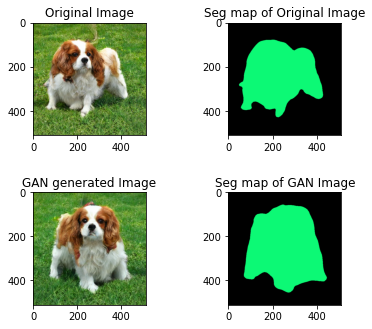

----------------------------------------------------------------------------------------------------
cost_old 4  is  tensor(1.2664, device='cuda:0', grad_fn=<SqrtBackward>)
cost 4  is  tensor(0.5246, device='cuda:0', grad_fn=<NllLoss2DBackward>)


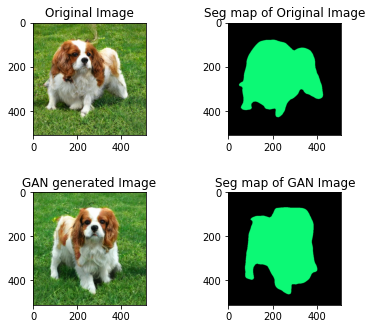

----------------------------------------------------------------------------------------------------
cost_old 5  is  tensor(1.2440, device='cuda:0', grad_fn=<SqrtBackward>)
cost 5  is  tensor(0.5052, device='cuda:0', grad_fn=<NllLoss2DBackward>)


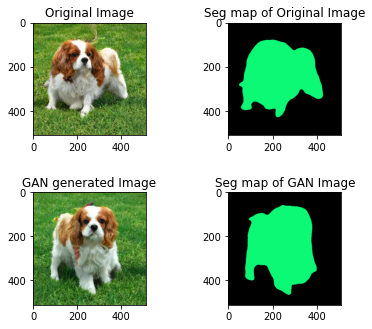

----------------------------------------------------------------------------------------------------
cost_old 6  is  tensor(1.3156, device='cuda:0', grad_fn=<SqrtBackward>)
cost 6  is  tensor(0.4379, device='cuda:0', grad_fn=<NllLoss2DBackward>)


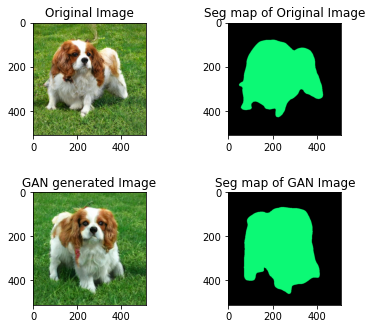

----------------------------------------------------------------------------------------------------
cost_old 7  is  tensor(1.1950, device='cuda:0', grad_fn=<SqrtBackward>)
cost 7  is  tensor(0.3601, device='cuda:0', grad_fn=<NllLoss2DBackward>)


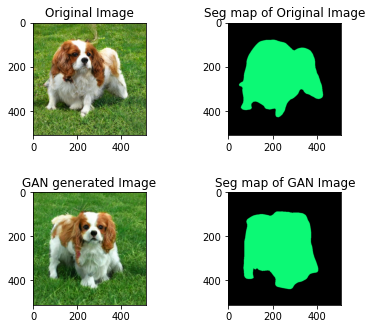

----------------------------------------------------------------------------------------------------
cost_old 8  is  tensor(1.2169, device='cuda:0', grad_fn=<SqrtBackward>)
cost 8  is  tensor(0.2879, device='cuda:0', grad_fn=<NllLoss2DBackward>)


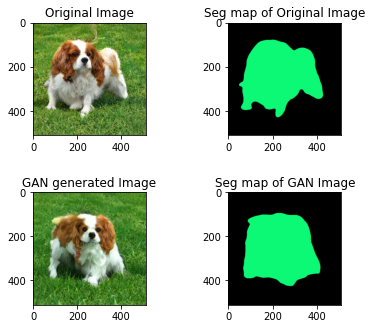

----------------------------------------------------------------------------------------------------
cost_old 9  is  tensor(1.2182, device='cuda:0', grad_fn=<SqrtBackward>)
cost 9  is  tensor(0.2501, device='cuda:0', grad_fn=<NllLoss2DBackward>)


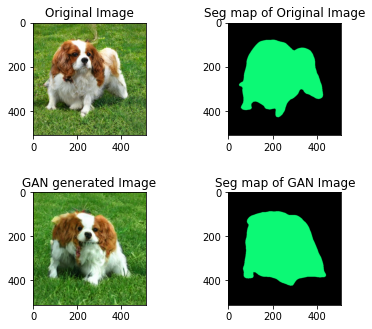

----------------------------------------------------------------------------------------------------
cost_old 10  is  tensor(1.2362, device='cuda:0', grad_fn=<SqrtBackward>)
cost 10  is  tensor(0.1942, device='cuda:0', grad_fn=<NllLoss2DBackward>)


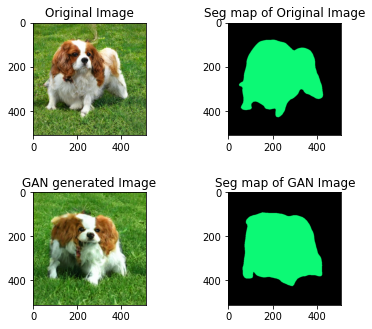

----------------------------------------------------------------------------------------------------


In [ ]:
biggan.eval()
# optimizer = torch.optim.AdamW([z], lr=0.1)
optimizer = torch.optim.Adam([z], lr=1e-1, betas=(0.5, 0.999))

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

for i in range(20):
    with torch.enable_grad():
        optimizer.zero_grad()
        img = biggan(z, c, truncation.item())
        output_predicted_image = model(0.5 * (img.cuda() + 1))['out'][0]
        output_original_image = model(input_batch)['out'][0]
    #     output_predicted_image = output.argmax(0).float()
        loss = torch.nn.CrossEntropyLoss()
        loss2 = torch.nn.MSELoss()
        cost_old = torch.sqrt(loss2(output_predicted_image, output_original_image))
        cost = loss(output_predicted_image.unsqueeze(0), output_original_image.argmax(0).unsqueeze(0))
        print("cost_old",i+1," is ", cost_old)
        print("cost",i+1," is ", cost)

    fig = plt.figure()
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

    ax1 = fig.add_subplot(221)
    ax1.title.set_text('Original Image')
    plt.imshow(input_image)

    ax2 = fig.add_subplot(222)
    ax2.title.set_text('Seg map of Original Image')
    r = Image.fromarray(model(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)

    ax3 = fig.add_subplot(223)
    ax3.title.set_text('GAN generated Image')
    pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
    plt.imshow(pil)

    ax4 = fig.add_subplot(224)
    ax4.title.set_text('Seg map of GAN Image')
    r = Image.fromarray(output_predicted_image.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    plt.show()

    print('-'*100)
    cost.backward()
    optimizer.step()

print('End')

In [ ]:
# # create a color pallette, selecting a color for each class
# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# # plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
# r.putpalette(colors)

# import matplotlib.pyplot as plt
# plt.imshow(r)
# # plt.show()